In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn import metrics
import unittest

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Loading Dataset From Google Drive**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/data_banknote_authentication.txt")

### **Unitest To chechk if file was read by Program**

In [4]:
unittest.TestCase.assertTrue(df, 'Data was not read from the dataset')

In [5]:
df.head()

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


### **Namaing Coulmns of Dataset for better understanding**

In [6]:
df.columns =['Variance', 'Skewness', 'Kurtosis' ,'Entropy', 'Class']

In [7]:
df.head()

,Variance,Skewness,Kurtosis,Entropy,Class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


### **Dropping Duplicates**

In [8]:
df = df.drop_duplicates()

In [9]:
df.head()

,Variance,Skewness,Kurtosis,Entropy,Class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


### **Dropping Null Values**

In [10]:
df = df.dropna()

In [11]:
df.head()

,Variance,Skewness,Kurtosis,Entropy,Class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


### **Performing Unit Testing to make sure there are no null values in Dataset**

In [12]:
tst = df.isnull()
print(tst)

      Variance  Skewness  Kurtosis  Entropy  Class
0        False     False     False    False  False
1        False     False     False    False  False
2        False     False     False    False  False
3        False     False     False    False  False
4        False     False     False    False  False
...        ...       ...       ...      ...    ...
1366     False     False     False    False  False
1367     False     False     False    False  False
1368     False     False     False    False  False
1369     False     False     False    False  False
1370     False     False     False    False  False

[1347 rows x 5 columns]


In [13]:
unittest.TestCase.assertTrue(tst, 'Data still contains Null Values')

###**Graphical Represenatation of Dataset**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


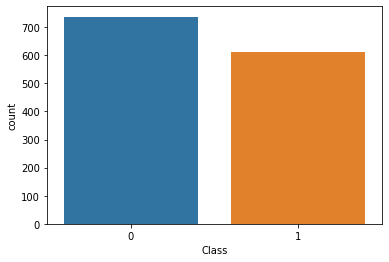

In [14]:
sns.countplot(df["Class"])

### **Data Normalization**

In [15]:
def nrmlzd(dta):
  normalized = (dta - dta.min()) / (dta.max() - dta.min())
  return  normalized
df = nrmlzd(df)

In [16]:
df.head()

,Variance,Skewness,Kurtosis,Entropy,Class
0,0.835659,0.820982,0.121804,0.644326,0.0
1,0.786629,0.416648,0.310608,0.786951,0.0
2,0.757105,0.871699,0.054921,0.450440,0.0
3,0.531578,0.348662,0.424662,0.687362,0.0
4,0.822859,0.877275,0.057100,0.489711,0.0


### **Heatmap visualization**

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

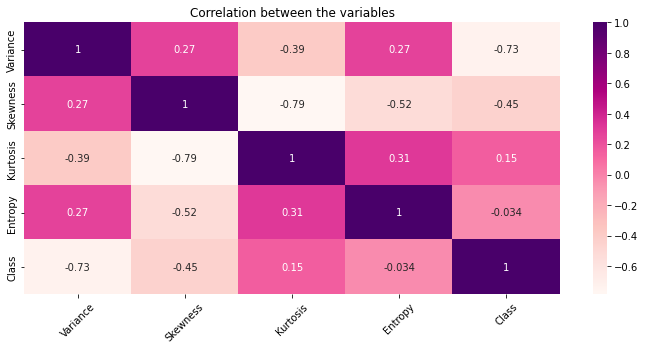

In [17]:
plt.subplots(figsize=(12,5))
gender_correlation=df.corr()
sns.heatmap(gender_correlation,annot=True,cmap='RdPu')
plt.title('Correlation between the variables')
plt.xticks(rotation=45)

### **Splitting Dataset**

In [18]:
x_value = df.iloc[:, :-1].values
y_value = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x_value, y_value, test_size=.3, random_state=42)

In [19]:
len(x_train)

942

In [20]:
len(y_test)

405

### **Applying Grid Search For Cross Validation**

In [21]:
parameters = {'max_iter': [20, 50, 100, 200, 500, 1000],'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'class_weight': ['balanced']}

In [22]:
model_grid = GridSearchCV(estimator= LogisticRegression(random_state=42), param_grid=parameters, verbose=1, cv=10, n_jobs=-1)
model_grid.fit(x_train, y_train)
print(model_grid.best_estimator_)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
LogisticRegression(class_weight='balanced', max_iter=20, random_state=42,
                   solver='newton-cg')


### **Putting best Parameters**

In [23]:
clf  = LogisticRegression(class_weight='balanced', max_iter=20, random_state=42,
                   solver='newton-cg')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

### **Unit Testing to check if Model is making Prediction**

In [24]:
unittest.TestCase.assertTrue(y_pred, 'The Model is not making any Prediction')

### **Calculating Accuracy**

In [25]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy = ' ,accuracy)

Accuracy =  0.9876543209876543


### **Confusion Matrix**

In [26]:
cm=confusion_matrix(y_test,y_pred)

Plot Confusion Matrix

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

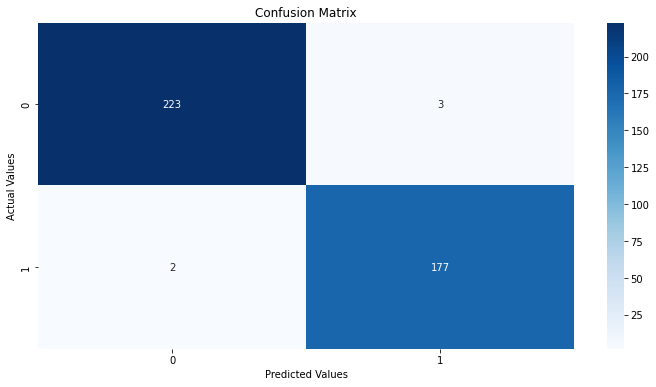

In [27]:
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png', dpi = 300)
files.download('confusion_matrix.png')

### **Classification Report**

In [28]:
hypothesis = ['Actual', 'Trained']
print(classification_report(y_test, y_pred, target_names= hypothesis))

              precision    recall  f1-score   support

      Actual       0.99      0.99      0.99       226
     Trained       0.98      0.99      0.99       179

    accuracy                           0.99       405
   macro avg       0.99      0.99      0.99       405
weighted avg       0.99      0.99      0.99       405



### **ROC Curve & AUC**

In [29]:
y_pred_proba = clf.predict_proba(x_test)[::,0]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

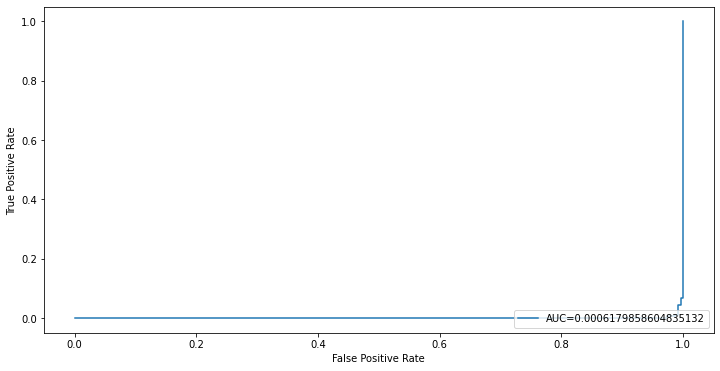

In [30]:
plt.figure(figsize=(12,6))
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.savefig('ROC&AUC.png', dpi=300)
files.download('ROC&AUC.png')
